# Inter-Uni Datathon 2025

In [85]:
import os, sys, json, time, math, itertools, random, textwrap
from datetime import datetime, timedelta, date
from pathlib import Path

import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9, 5)
plt.rcParams["axes.grid"] = True

# seed for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [51]:
visitation = pd.read_csv("data/VisitationData.csv")
climate = pd.read_csv("data/ClimdateData.csv")

In [52]:
visitation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            165 non-null    float64
 1   Week            165 non-null    float64
 2   Mt. Baw Baw     165 non-null    float64
 3   Mt. Stirling    165 non-null    float64
 4   Mt. Hotham      165 non-null    float64
 5   Falls Creek     165 non-null    float64
 6   Mt. Buller      165 non-null    float64
 7   Selwyn          165 non-null    float64
 8   Thredbo         165 non-null    float64
 9   Perisher        165 non-null    float64
 10  Charlotte Pass  165 non-null    float64
dtypes: float64(11)
memory usage: 86.0 KB


In [53]:
climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39813 entries, 0 to 39812
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Bureau of Meteorology station number  39813 non-null  int64  
 1   Year                                  39813 non-null  int64  
 2   Month                                 39813 non-null  int64  
 3   Day                                   39813 non-null  int64  
 4   Maximum temperature (Degree C)        38275 non-null  float64
 5   Minimum temperature (Degree C)        38280 non-null  float64
 6   Rainfall amount (millimetres)         37857 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 2.1 MB


In [54]:
# your start / end (month, day only)
start_month, start_day = 6, 9
end_month, end_day     = 9, 22

# build a datetime for easy comparisons (any year)
climate["date"] = pd.to_datetime(climate[["Year","Month","Day"]])

def in_range(row, start_m, start_d, end_m, end_d):
    # build dates for that specific year
    year = row["Year"]
    start = pd.Timestamp(year=year, month=start_m, day=start_d)
    end   = pd.Timestamp(year=year, month=end_m,   day=end_d)
    return start <= row["date"] <= end

climate_clean = climate[climate.apply(in_range, axis=1,
                                      args=(start_month, start_day, end_month, end_day))]
climate_clean = climate_clean[climate_clean["Year"]>=2014]
climate_clean.to_csv("intermediate/climate_snowseason.csv")

In [55]:
climate_clean.columns

Index(['Bureau of Meteorology station number', 'Year', 'Month', 'Day',
       'Maximum temperature (Degree C)', 'Minimum temperature (Degree C)',
       'Rainfall amount (millimetres)', 'date'],
      dtype='object')

In [56]:
vis_long = visitation.melt(
    id_vars=["Year","Week"],
    var_name="Resort",
    value_name="Visitors"
)

In [57]:
# drop rows where Year/Week/Visitors are missing
vis_long = vis_long.dropna(subset=["Year","Week","Visitors"])

# ensure numeric types
vis_long["Year"] = vis_long["Year"].astype(int)
vis_long["Week"] = vis_long["Week"].astype(int)
vis_long["Visitors"] = vis_long["Visitors"].astype(int)

# optional: reset index after cleaning
vis_long = vis_long.reset_index(drop=True)


In [58]:
vis_long.to_csv("intermediate/vis_long.csv")

In [59]:
annual_vis = (
    vis_long
    .groupby("Year")["Visitors"]
    .sum()
    .reset_index()
)
print(annual_vis.head())

   Year  Visitors
0  2014   2486386
1  2015   2451048
2  2016   2463680
3  2017   2776862
4  2018   2940416


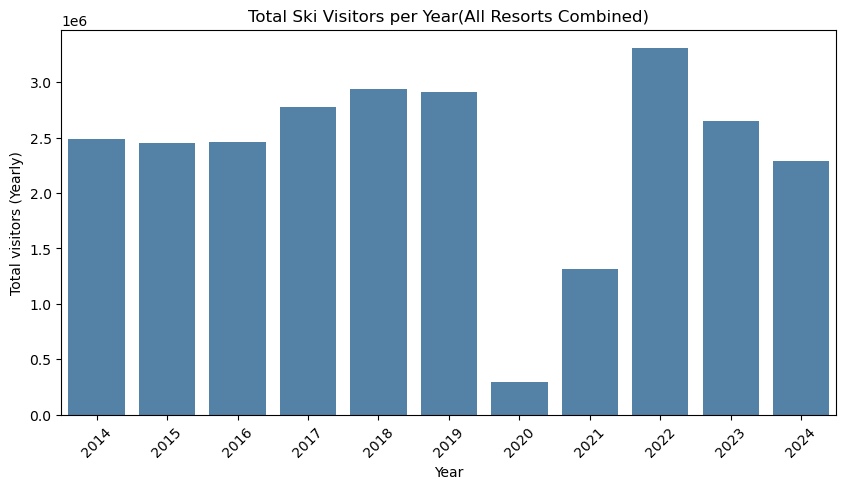

In [60]:
plt.figure(figsize=(10,5))
sns.barplot(data=annual_vis, x="Year", y="Visitors", color="steelblue")
plt.title("Total Ski Visitors per Year(All Resorts Combined)")
plt.ylabel("Total visitors (Yearly)")
plt.xticks(rotation=45)
plt.grid(False)   
plt.show()

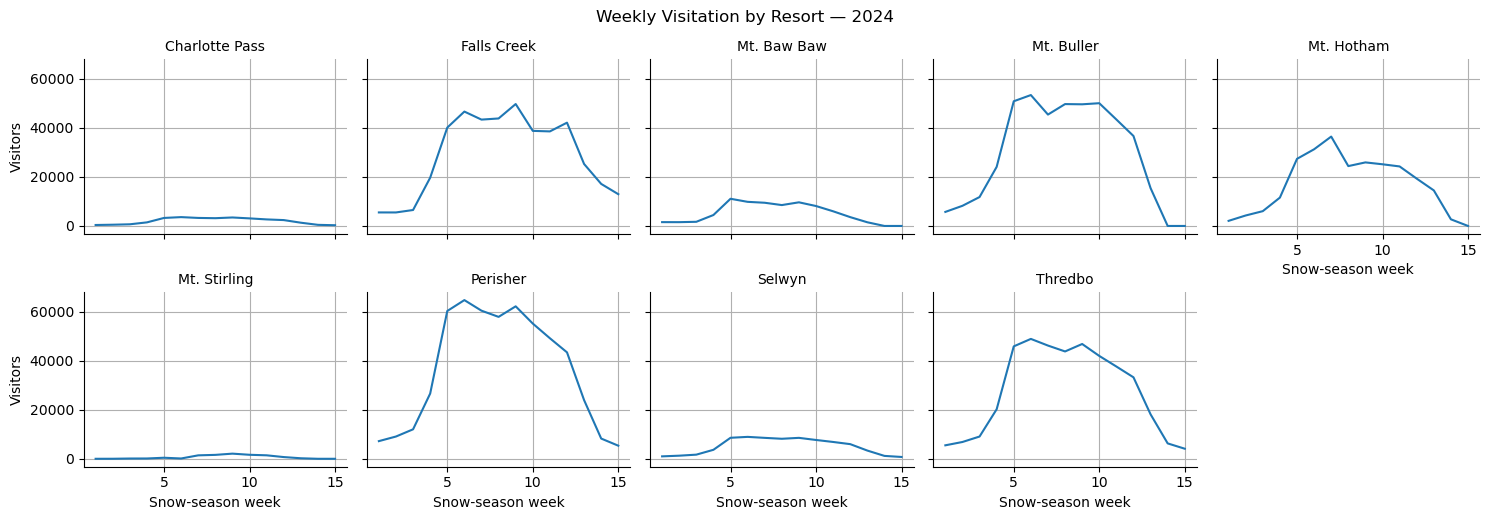

In [61]:
year_to_plot = 2024  # <-- change this

df_year = vis_long[vis_long["Year"] == year_to_plot].copy()

# sort resorts (optional)
resort_order = sorted(df_year["Resort"].unique())
df_year["Resort"] = pd.Categorical(df_year["Resort"], categories=resort_order, ordered=True)

# one small line plot per resort; arrange as columns
g = sns.relplot(
    data=df_year,
    x="Week", y="Visitors",
    col="Resort",
    kind="line",
    estimator=None,
    col_wrap=5,        # 5 columns per row (10 resorts → 2 rows)
    height=2.5, aspect=1.2,
    facet_kws={"sharey": True, "sharex": True}
)

g.set_titles(col_template="{col_name}")
g.set_axis_labels("Snow-season week", "Visitors")
g.fig.suptitle(f"Weekly Visitation by Resort — {year_to_plot}", y=1.03)
plt.show()


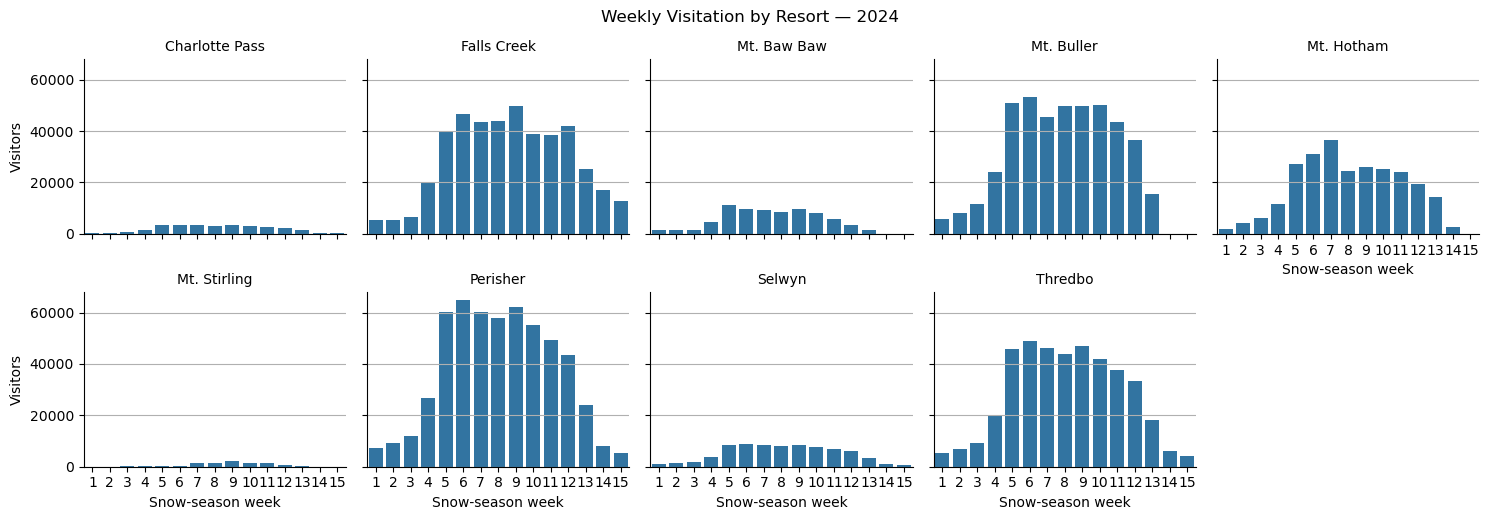

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

year_to_plot = 2024  # <-- change this

df_year = vis_long[vis_long["Year"] == year_to_plot].copy()

# sort resorts (optional)
resort_order = sorted(df_year["Resort"].unique())
df_year["Resort"] = pd.Categorical(df_year["Resort"], categories=resort_order, ordered=True)

# bar plots (histogram-like, one per resort)
g = sns.catplot(
    data=df_year,
    x="Week", y="Visitors",
    col="Resort",
    kind="bar",             # <--- bar instead of line
    col_wrap=5,             # 5 columns per row
    height=2.5, aspect=1.2,
    sharey=True, sharex=True
)

g.set_titles("{col_name}")
g.set_axis_labels("Snow-season week", "Visitors")
g.fig.suptitle(f"Weekly Visitation by Resort — {year_to_plot}", y=1.03)
plt.show()


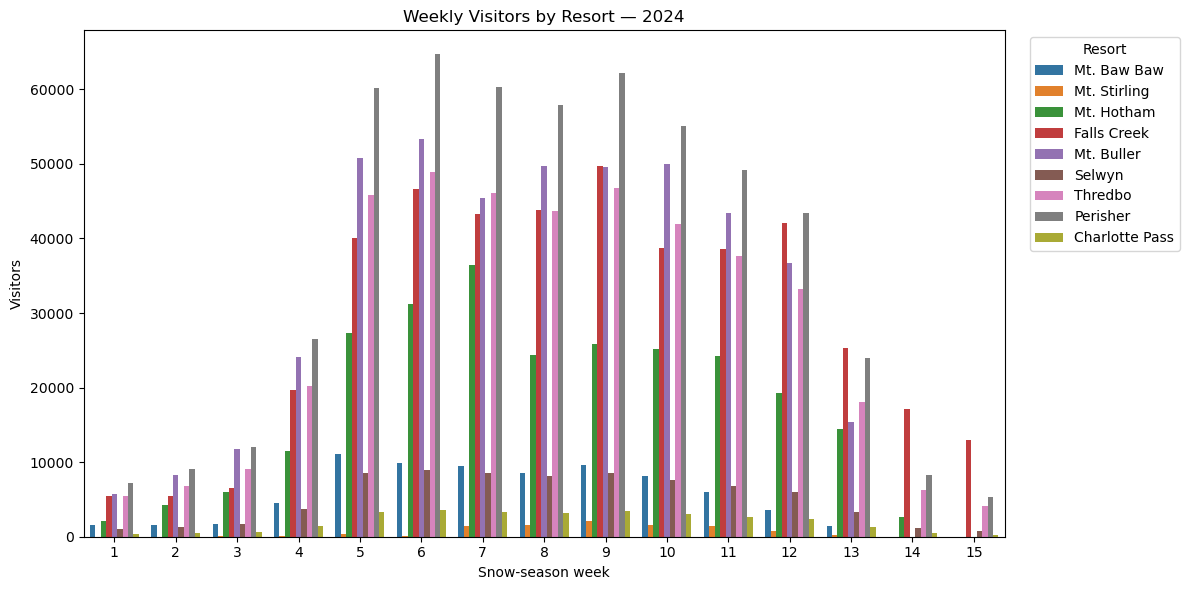

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year_to_plot = 2024  # change as needed

# 1) filter + clean
df_year = (
    vis_long[vis_long["Year"] == year_to_plot]
    .dropna(subset=["Week","Resort","Visitors"])
    .copy()
)
df_year["Week"] = df_year["Week"].astype(int)

# fix order: weeks 1..15
week_order = list(range(1, 16))
df_year["Week"] = pd.Categorical(df_year["Week"], categories=week_order, ordered=True)

# 2) grouped bars (9 bars per week)
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=df_year,
    x="Week", y="Visitors",
    hue="Resort", dodge=True, estimator="sum"
)
ax.set_title(f"Weekly Visitors by Resort — {year_to_plot}")
ax.set_xlabel("Snow-season week"); ax.set_ylabel("Visitors")
ax.grid(False)  # remove horizontal lines
ax.legend(title="Resort", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [64]:
# 确保有 datetime
climate_clean["date"] = pd.to_datetime(climate_clean[["Year","Month","Day"]])

# 定义雪季起始日
season_start_month, season_start_day = 6, 9

def assign_snow_week(row):
    year = row["Year"]
    start = pd.Timestamp(year=year, month=season_start_month, day=season_start_day)
    # 距离雪季起点的天数
    delta_days = (row["date"] - start).days
    if delta_days < 0 or delta_days > (15*7):  # 不在雪季范围
        return None
    return delta_days // 7 + 1   # week 从1开始

climate_clean["Week"] = climate_clean.apply(assign_snow_week, axis=1)


In [65]:
climate_weekly = (
    climate_clean.dropna(subset=["Week"])
    .groupby(["Year","Week"])
    .agg({
        "Maximum temperature (Degree C)": "mean",
        "Minimum temperature (Degree C)": "mean",
        "Rainfall amount (millimetres)": "sum"
    })
    .reset_index()
)


In [66]:

# =========================
# 1) Resort → Station mapping
# =========================
# Fill/adjust as needed:
RESORT_TO_STATION = {
    "Thredbo":         71032,  # Thredbo AWS
    "Perisher":        71075,  # Perisher AWS
    "Selwyn":          72161,  # Cabramurra SMHEA AWS (closest for Selwyn)
    "Charlotte Pass":  71075,  # often use Perisher AWS; change if you prefer 72161
    "Mt. Buller":      83024,  # Mount Buller
    "Falls Creek":     83084,  # Falls Creek
    "Mt. Hotham":      83085,  # Mount Hotham
    "Mt. Baw Baw":     85291,  # Mount Baw Baw
    "Mt. Stirling":    83024,  # share with Buller (no dedicated BoM AWS)
}

# =========================
# 2) Build Week (1..15) on climate & aggregate by station
# =========================
# climate_clean must have columns:
# ['Bureau of Meteorology station number','Year','Month','Day',
#  'Maximum temperature (Degree C)','Minimum temperature (Degree C)',
#  'Rainfall amount (millimetres)']

cl = climate_clean.copy()
cl["date"] = pd.to_datetime(cl[["Year","Month","Day"]], errors="coerce")

# Week 1 = Jun 9; every 7 days a new week; cap at 15; filter to Jun 9 .. Sep 15 inclusive
season_start = pd.to_datetime({"year": cl["Year"].astype(int), "month": 6, "day": 9})
season_end   = pd.to_datetime({"year": cl["Year"].astype(int), "month": 9, "day": 15})
delta_days   = (cl["date"] - season_start).dt.days

cl = cl[(cl["date"] >= season_start) & (cl["date"] <= season_end)].copy()
cl["Week"] = ((delta_days // 7) + 1).clip(lower=1, upper=15).astype(int)

# standardize column names
cl = cl.rename(columns={
    "Bureau of Meteorology station number": "station_id",
    "Maximum temperature (Degree C)": "TempMax_C",
    "Minimum temperature (Degree C)": "TempMin_C",
    "Rainfall amount (millimetres)": "Rain_mm",
})

# weekly climate by station
climate_weekly_by_station = (
    cl.groupby(["Year","Week","station_id"], as_index=False)
      .agg({"TempMax_C":"mean", "TempMin_C":"mean", "Rain_mm":"sum"})
)


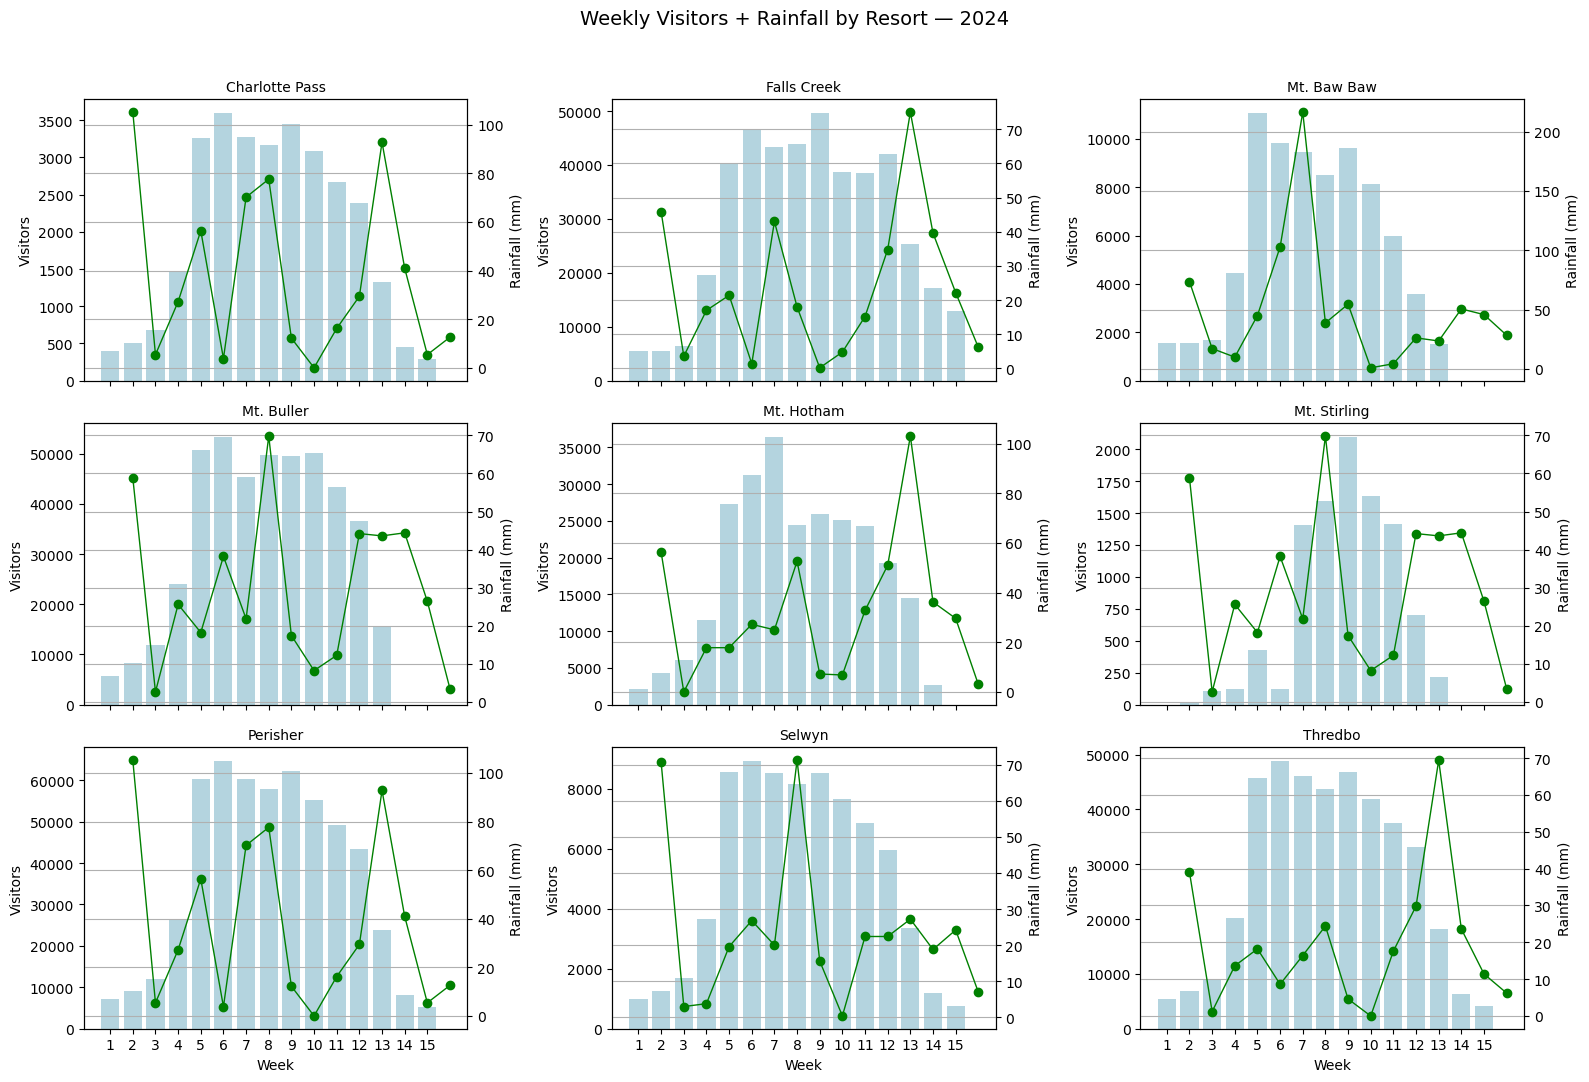

In [67]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year_to_plot = 2024

# --- ensure clean types
vl = vis_long.dropna(subset=["Year","Week","Resort","Visitors"]).copy()
vl["Year"] = vl["Year"].astype(int)
vl["Week"] = vl["Week"].astype(int)

cl_by_stn = climate_weekly_by_station.copy()
cl_by_stn["Year"] = cl_by_stn["Year"].astype(int)
cl_by_stn["Week"] = cl_by_stn["Week"].astype(int)

# --- pick resorts present that also have a station mapping
resorts = sorted([r for r in vl["Resort"].unique() if r in RESORT_TO_STATION])

# --- layout
n = len(resorts)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 11), sharex=True)
axes = axes.flatten()

# --- precompute climate for the year
clim_year = cl_by_stn[cl_by_stn["Year"] == year_to_plot].copy()

# canonical week axis 1..15
wk_index = pd.DataFrame({"Week": list(range(1, 16))})

for i, resort in enumerate(resorts):
    ax1 = axes[i]
    stn = RESORT_TO_STATION[resort]

    # visitors for this resort/year
    df_r = (
        vl[(vl["Resort"] == resort) & (vl["Year"] == year_to_plot)]
        .groupby("Week", as_index=False)["Visitors"].sum()
        .merge(wk_index, on="Week", how="right")  # ensure all weeks present
        .fillna({"Visitors": 0})
        .sort_values("Week")
    )

    # rainfall for this resort's station
    clim_r = (
        clim_year[clim_year["station_id"] == stn][["Week", "Rain_mm"]]
        .merge(wk_index, on="Week", how="right")
        .fillna({"Rain_mm": 0})
        .sort_values("Week")
    )

    # bars = visitors
    sns.barplot(data=df_r, x="Week", y="Visitors", color="lightblue", ax=ax1)
    ax1.set_title(resort, fontsize=10)
    ax1.set_xlabel("Week")
    ax1.set_ylabel("Visitors")
    ax1.grid(False)

    # line = rainfall (right axis)
    ax2 = ax1.twinx()
    ax2.plot(clim_r["Week"], clim_r["Rain_mm"], marker="o", linewidth=1., color="green")
    ax2.set_ylabel("Rainfall (mm)")

# remove any unused axes if resorts < grid size
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f"Weekly Visitors + Rainfall by Resort — {year_to_plot}", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


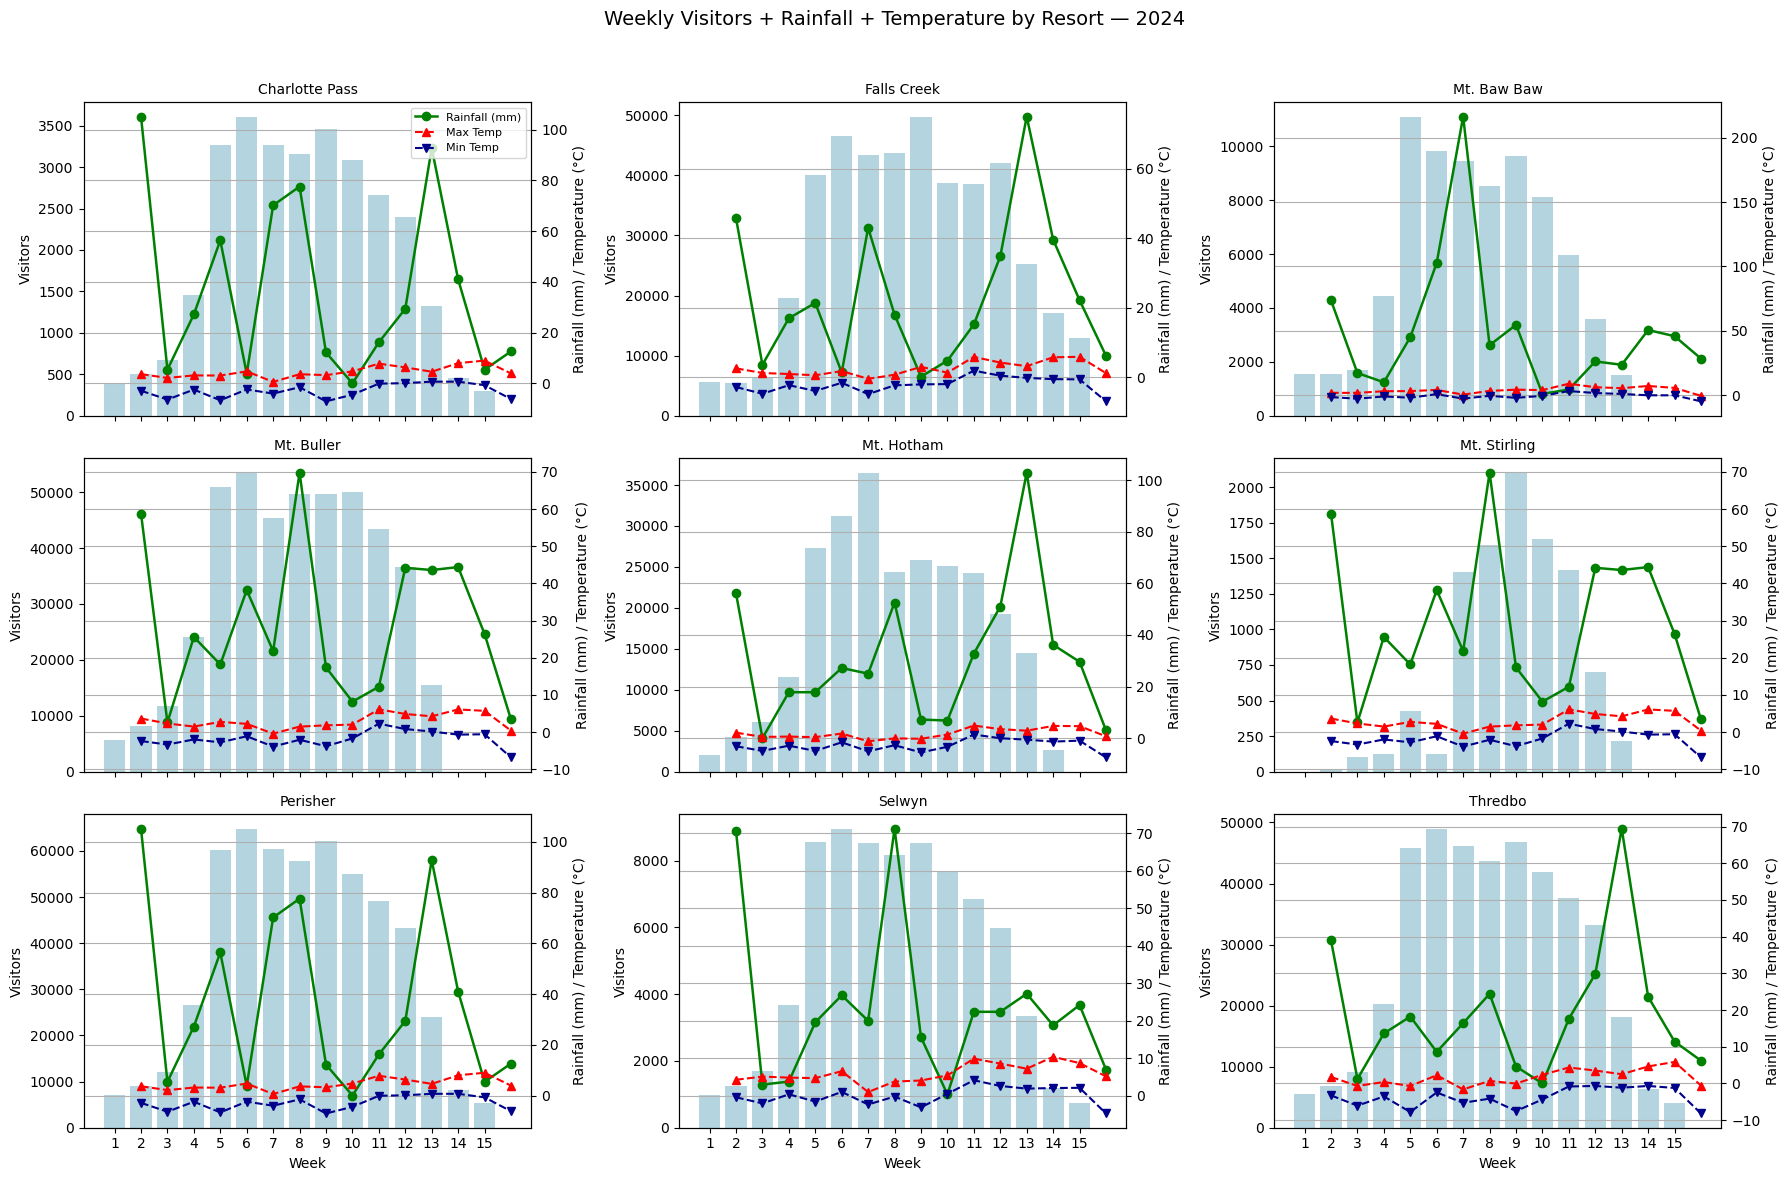

In [68]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

year_to_plot = 2024

# --- ensure clean types
vl = vis_long.dropna(subset=["Year","Week","Resort","Visitors"]).copy()
vl["Year"] = vl["Year"].astype(int)
vl["Week"] = vl["Week"].astype(int)

cl_by_stn = climate_weekly_by_station.copy()
cl_by_stn["Year"] = cl_by_stn["Year"].astype(int)
cl_by_stn["Week"] = cl_by_stn["Week"].astype(int)

# --- pick resorts present that also have a station mapping
resorts = sorted([r for r in vl["Resort"].unique() if r in RESORT_TO_STATION])

# --- layout
n = len(resorts)
ncols = 3
nrows = math.ceil(n / ncols)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, 12), sharex=True)
axes = axes.flatten()

# --- precompute climate for the year
clim_year = cl_by_stn[cl_by_stn["Year"] == year_to_plot].copy()

# canonical week axis 1..15
wk_index = pd.DataFrame({"Week": list(range(1, 16))})

for i, resort in enumerate(resorts):
    ax1 = axes[i]
    stn = RESORT_TO_STATION[resort]

    # visitors for this resort/year
    df_r = (
        vl[(vl["Resort"] == resort) & (vl["Year"] == year_to_plot)]
        .groupby("Week", as_index=False)["Visitors"].sum()
        .merge(wk_index, on="Week", how="right")  # ensure all weeks present
        .fillna({"Visitors": 0})
        .sort_values("Week")
    )

    # climate (rainfall + temps) for this resort's station
    clim_r = (
        clim_year[clim_year["station_id"] == stn][["Week", "Rain_mm", "TempMax_C", "TempMin_C"]]
        .merge(wk_index, on="Week", how="right")
        .fillna({"Rain_mm": 0})
        .sort_values("Week")
    )

    # bars = visitors
    sns.barplot(data=df_r, x="Week", y="Visitors", color="lightblue", ax=ax1)
    ax1.set_title(resort, fontsize=10)
    ax1.set_xlabel("Week")
    ax1.set_ylabel("Visitors")
    ax1.grid(False)

    # climate lines on right axis
    ax2 = ax1.twinx()
    ax2.plot(clim_r["Week"], clim_r["Rain_mm"], color="green", marker="o", linewidth=1.8, label="Rainfall (mm)")
    ax2.plot(clim_r["Week"], clim_r["TempMax_C"], color="red", marker="^", linestyle="--", linewidth=1.5, label="Max Temp")
    ax2.plot(clim_r["Week"], clim_r["TempMin_C"], color="darkblue", marker="v", linestyle="--", linewidth=1.5, label="Min Temp")
    ax2.set_ylabel("Rainfall (mm) / Temperature (°C)")

    # only add legend once (top left subplot)
    if i == 0:
        ax2.legend(loc="upper right", fontsize=8)

# remove any unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle(f"Weekly Visitors + Rainfall + Temperature by Resort — {year_to_plot}", fontsize=14, y=0.98)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [69]:
climate_weekly_by_station 

,Year,Week,station_id,TempMax_C,TempMin_C,Rain_mm
0,2014,1,71032,4.714286,-2.000000,40.6
1,2014,1,71075,6.328571,-1.585714,62.0
2,2014,1,72161,6.828571,1.571429,29.2
3,2014,1,83024,4.271429,-0.014286,14.2
4,2014,1,83084,4.600000,-0.300000,23.8
...,...,...,...,...,...,...
1205,2025,8,72161,2.200000,-0.100000,54.4
1206,2025,8,83024,0.300000,-1.200000,38.0
1207,2025,8,83084,0.000000,-1.200000,33.8
1208,2025,8,83085,-0.100000,-1.700000,32.8


In [70]:
# 确保 Year/Week 是整数
vis_long_clean = vis_long.dropna(subset=["Year","Week","Resort","Visitors"]).copy()
vis_long_clean["Year"] = vis_long_clean["Year"].astype(int)
vis_long_clean["Week"] = vis_long_clean["Week"].astype(int)

# 映射雪场 -> station_id
vis_long_clean["station_id"] = vis_long_clean["Resort"].map(RESORT_TO_STATION)

# === 合并人数和气候 ===
vis_with_climate = vis_long_clean.merge(
    climate_weekly_by_station,
    on=["Year","Week","station_id"],   # 按年份、周数和气象站对齐
    how="left"
)

print(vis_with_climate.head())


   Year  Week       Resort  Visitors  station_id  TempMax_C  TempMin_C  \
0  2014     1  Mt. Baw Baw       555       85291   4.957143   1.100000   
1  2014     2  Mt. Baw Baw       804       85291   5.485714   0.814286   
2  2014     3  Mt. Baw Baw       993       85291   1.042857  -1.814286   
3  2014     4  Mt. Baw Baw      2976       85291   2.528571  -0.957143   
4  2014     5  Mt. Baw Baw     11112       85291   0.685714  -2.257143   

   Rain_mm  
0     24.4  
1     21.0  
2     76.4  
3     82.0  
4     82.6  


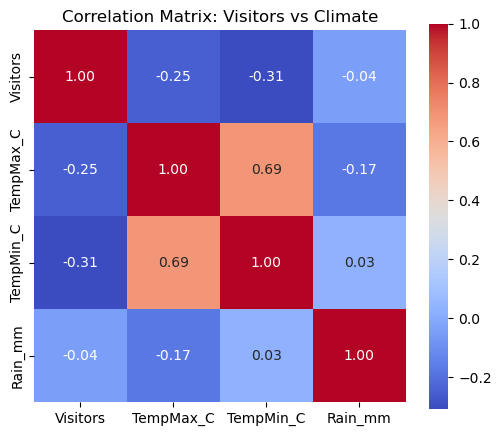

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

# 选择数值列做相关性分析
corr_cols = ["Visitors", "TempMax_C", "TempMin_C", "Rain_mm"]
corr = vis_with_climate[corr_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Matrix: Visitors vs Climate")
plt.grid(False)
plt.show()


<Axes: xlabel='Visitors', ylabel='TempMin_C'>

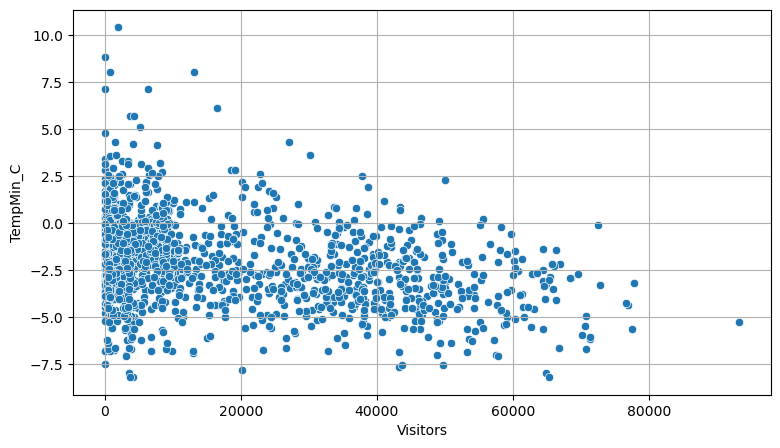

In [72]:
sns.scatterplot(x=vis_with_climate['Visitors'], y=vis_with_climate['TempMin_C'])


In [73]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 去掉 2020 年的数据
df_no2020 = vis_with_climate[vis_with_climate["Year"] != 2020].copy()

# 确保数据干净
df = df_no2020.dropna(subset=["Visitors","TempMax_C","TempMin_C","Rain_mm"]).copy()

# 特征 & 标签
X = df[["Week","TempMax_C","TempMin_C","Rain_mm"]]
y = df["Visitors"]

# 拆分训练 (2014–2023) 和测试 (2024)
train = df[df["Year"] < 2024]
test = df[df["Year"] == 2024]

X_train, y_train = train[["Week","TempMax_C","TempMin_C","Rain_mm"]], train["Visitors"]
X_test, y_test = test[["Week","TempMax_C","TempMin_C","Rain_mm"]], test["Visitors"]

# 线性回归
model = LinearRegression()
model.fit(X_train, y_train)

# 预测
y_pred = model.predict(X_test)

# 评估指标
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("回归系数:", model.coef_)
print("截距:", model.intercept_)
print("MSE:", mse)
print("R²:", r2)


回归系数: [  880.78409053  -600.07346793 -2739.68088389   -15.91747318]
截距: 8516.562597598126
MSE: 404629633.0753306
R²: -0.1373369080502176


In [74]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model.fit(X_train_poly, y_train)
y_pred = model.predict(X_test_poly)

# 评估指标
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)

print("回归系数:", model.coef_)
print("截距:", model.intercept_)
print("MSE:", mse)
print("R²:", r2)


回归系数: [ 5.43998015e+03  1.74317266e+03 -3.67382461e+03 -2.83258376e+01
 -2.79570626e+02 -5.08622291e+01  8.73122757e+00 -2.69962053e+00
 -1.27895659e+02  2.98255009e+02  5.08384544e+00  2.98756480e+01
  1.64260037e+00  1.44027376e-01]
截距: -9489.5752159258
MSE: 328781567.48123425
R²: 0.0758575724151308


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

results = []

# 去掉 2020 年
df_no2020 = vis_with_climate[vis_with_climate["Year"] != 2020].copy()

# 遍历每个雪场
for resort in df_no2020["Resort"].unique():
    sub = df_no2020[df_no2020["Resort"] == resort].dropna(subset=["Visitors","TempMax_C","TempMin_C","Rain_mm"])
    
    # 划分训练集(2014–2023) 和 测试集(2024)
    train = sub[sub["Year"] < 2024]
    test  = sub[sub["Year"] == 2024]
    if train.empty or test.empty:
        continue  # 避免没有测试集的情况
    
    X_train = train[["Week","TempMax_C","TempMin_C","Rain_mm"]]
    y_train = train["Visitors"]
    X_test  = test[["Week","TempMax_C","TempMin_C","Rain_mm"]]
    y_test  = test["Visitors"]
    
    # 线性回归
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)

    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    
    results.append({
        "Resort": resort,
        "MSE": mse,
        "R²": r2,
        "Coef": model.coef_,
        "Intercept": model.intercept_
    })

# 打印结果
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df)


           Resort           MSE        R²  \
0     Mt. Baw Baw  6.657480e+06  0.553420   
1    Mt. Stirling  4.053735e+05  0.228153   
2      Mt. Hotham  1.292498e+08  0.021101   
3     Falls Creek  9.979019e+07  0.601309   
4      Mt. Buller  1.779442e+08  0.559047   
5          Selwyn  7.159398e+06  0.297034   
6         Thredbo  1.790321e+08  0.404443   
7        Perisher  2.119709e+08  0.593982   
8  Charlotte Pass  6.370458e+05  0.596168   

                                                Coef     Intercept  
0  [1701.5124093854815, -552.1720194609524, 1984....   4919.627560  
1  [256.2360396464826, -267.2052728376965, 367.79...    470.133186  
2  [8622.376465350284, 360.0848013387201, 1881.94...  -5318.590370  
3  [8476.552361200482, 504.00760749789697, 1371.7...  -4078.587059  
4  [10205.210018313443, -4673.455310639404, 8578....  16478.027272  
5  [1805.8018892050318, -338.8926502592984, 810.5...   1875.478731  
6  [11616.486966703163, 7674.982898738873, -7093.... -30879.221042

# Data Preprocessing

In [78]:
accessbility = pd.read_csv("data/ski_resorts_distances.csv")


In [83]:
lift_feature = pd.read_csv("data/ticket_lift_fees.csv")

In [ ]:
vic_snowfall

## Data Warangling

## Feature Selection

# Accessibility